# CROSS VALIDATION


In [1]:
import os
import pandas as pd
import numpy as np

from google.colab import drive

import datetime

from tqdm import tqdm

drive.mount('/content/drive')
path = "/content/drive/MyDrive/DSO 530 Project"

os.chdir(path)

import pandas as pd
train = 'option_train.csv'
train = pd.read_csv(train)
train.head()

Mounted at /content/drive


,Unnamed: 0,Value,S,K,tau,r,BS
0,1,348.500,1394.46,1050,0.128767,0.0116,Under
1,2,149.375,1432.25,1400,0.679452,0.0113,Under
2,3,294.500,1478.90,1225,0.443836,0.0112,Under
3,4,3.375,1369.89,1500,0.117808,0.0119,Over
4,5,84.000,1366.42,1350,0.298630,0.0119,Under


In [2]:
# @title
train["BS_Binary"] = np.where(train["BS"] == 'Over', 1, 0)
train.head()

,Unnamed: 0,Value,S,K,tau,r,BS,BS_Binary
0,1,348.500,1394.46,1050,0.128767,0.0116,Under,0
1,2,149.375,1432.25,1400,0.679452,0.0113,Under,0
2,3,294.500,1478.90,1225,0.443836,0.0112,Under,0
3,4,3.375,1369.89,1500,0.117808,0.0119,Over,1
4,5,84.000,1366.42,1350,0.298630,0.0119,Under,0


In [3]:
from sklearn.model_selection import KFold ## for regression
from sklearn.model_selection import StratifiedKFold ##
kfolds = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
print(kfolds)

StratifiedKFold(n_splits=10, random_state=1, shuffle=True)


In [4]:
for train_index, test_index in kfolds.split(train, train['BS_Binary']):
    print("train_index:{}\n\ntest_index;{}".format(train_index, test_index))
    break

train_index:[   0    1    2 ... 4996 4997 4999]

test_index;[   5   28   59   70   78   84  100  104  107  132  135  153  155  158
  161  162  168  169  180  202  213  216  226  258  275  309  310  343
  345  346  352  382  393  402  410  436  439  444  447  451  455  476
  477  482  486  501  507  510  517  519  528  546  560  564  565  582
  585  588  593  633  642  656  657  671  673  678  682  685  689  702
  705  751  767  771  775  776  778  783  794  803  807  828  858  863
  867  876  887  890  893  898  904  923  941  950  960  976  981 1007
 1013 1022 1031 1034 1037 1041 1046 1052 1063 1069 1070 1071 1085 1086
 1088 1097 1135 1143 1173 1196 1214 1219 1227 1231 1232 1235 1247 1251
 1255 1267 1269 1300 1321 1339 1347 1363 1373 1376 1379 1391 1400 1410
 1423 1424 1425 1431 1438 1447 1464 1470 1472 1483 1485 1495 1512 1537
 1541 1544 1554 1581 1616 1627 1632 1644 1646 1653 1655 1660 1668 1684
 1687 1694 1695 1696 1704 1722 1742 1743 1748 1751 1753 1755 1760 1766
 1774 1780 1793 1

In [5]:
cv_classification_errors_1 = []
cv_auc_1 = []

import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import numpy as np

for train_index, test_index in kfolds.split(train, train['BS_Binary']):
    train_subset = train.iloc[train_index]


    print(train_subset[['S', 'K', 'BS_Binary']].dtypes)

    # Training the logistic model
    result = smf.logit('BS_Binary ~ S + K', data=train_subset).fit(disp=0)

    # kfolds.split
    X_test = train.loc[test_index, ['S', 'K']]
    y_test = train.loc[test_index, 'BS_Binary']

    # Compute the probabilities of test data
    result_prob = result.predict(X_test)

    # Select 0.5 as the threshold
    result_pred = (result_prob > 0.5)
    result_pred = np.reshape(result_pred, y_test.shape)

    # Classification error
    classification_error = np.mean(result_pred != y_test)
    cv_classification_errors_1.append(classification_error)

    # Calculate AUC
    fpr, tpr, threshold = roc_curve(y_test, result_prob)
    roc_auc = auc(fpr, tpr)
    cv_auc_1.append(roc_auc)

In [ ]:
print(train_subset[['S', 'K', 'BS_Binary']].dtypes)

# Training the logistic model
result = smf.logit('BS_Binary ~ S + K', data=train_subset).fit(disp=0)

# kfolds.split
X_test = train.loc[test_index, ['S', 'K']]
y_test = train.loc[test_index, 'BS_Binary']

# Compute the probabilities of test data
result_prob = result.predict(X_test)

# Select 0.5 as the threshold
result_pred = (result_prob > 0.5)
result_pred = np.reshape(result_pred, y_test.shape)

# Classification error
classification_error = np.mean(result_pred != y_test)
cv_classification_errors_1.append(classification_error)

# Calculate AUC
fpr, tpr, threshold = roc_curve(y_test, result_prob)
roc_auc = auc(fpr, tpr)
cv_auc_1.append(roc_auc)

In [7]:
print("classification errors using 10-fold CV: {}\n".format(cv_classification_errors_1))
print("mean of classification errors using 10-fold CV: {}\n".format(np.mean(cv_classification_errors_1)))

classification errors using 10-fold CV: [0.142, 0.166, 0.15, 0.148, 0.162, 0.146, 0.144, 0.134, 0.168, 0.164]

mean of classification errors using 10-fold CV: 0.1524



In [8]:
print("auc using 10-fold CV: {}\n".format(cv_auc_1))
print("mean of auc using 10-fold CV: {}".format(np.mean(cv_auc_1)))

auc using 10-fold CV: [0.9153803937710092, 0.9143056413070819, 0.9093892204614574, 0.9175984999199652, 0.9167295511193433, 0.905890558185269, 0.898698863506437, 0.9044041983947314, 0.9054972275247705, 0.90404281428961]

mean of auc using 10-fold CV: 0.9091936968479676


In [ ]:
kfolds

In [ ]:
cv_classification_errors_2 = []
cv_auc_2 = []

In [ ]:
for train_index, test_index in kfolds.split(train, train['BS_Binary']):
    train_subset = train.iloc[train_index]


    print(train_subset[['r', 'tau', 'BS_Binary']].dtypes)

    # Train the logistic model
    result = smf.logit('BS_Binary ~ r + tau', data=train_subset).fit(disp=0)

    # Select the test set according to test_index produced by kfolds.split
    X_test = train.loc[test_index, ['r', 'tau']]
    y_test = train.loc[test_index, 'BS_Binary']

    result_prob = result.predict(X_test)

    result_pred = (result_prob > 0.5)
    result_pred = np.reshape(result_pred, y_test.shape)

    classification_error = np.mean(result_pred != y_test)
    cv_classification_errors_2.append(classification_error)

    fpr, tpr, threshold = roc_curve(y_test, result_prob)
    roc_auc = auc(fpr, tpr)
    cv_auc_2.append(roc_auc)

In [ ]:
print("auc using 10-fold CV: {}\n".format(cv_auc_2))
print("mean of auc using 10-fold CV: {}".format(np.mean(cv_auc_2)))

In [ ]:
print("predictor varible: S, K; response variable: BS")
print("mean of classification errors using 10-fold CV: {}".format(np.mean(cv_classification_errors_1)))
print("mean of auc using 10-fold CV: {}\n".format(np.mean(cv_auc_1)))
print("predictor varible: r, tau; response variable: BS")
print("mean of classification errors using 10-fold CV: {}".format(np.mean(cv_classification_errors_2)))
print("mean of auc using 10-fold CV: {}".format(np.mean(cv_auc_2)))

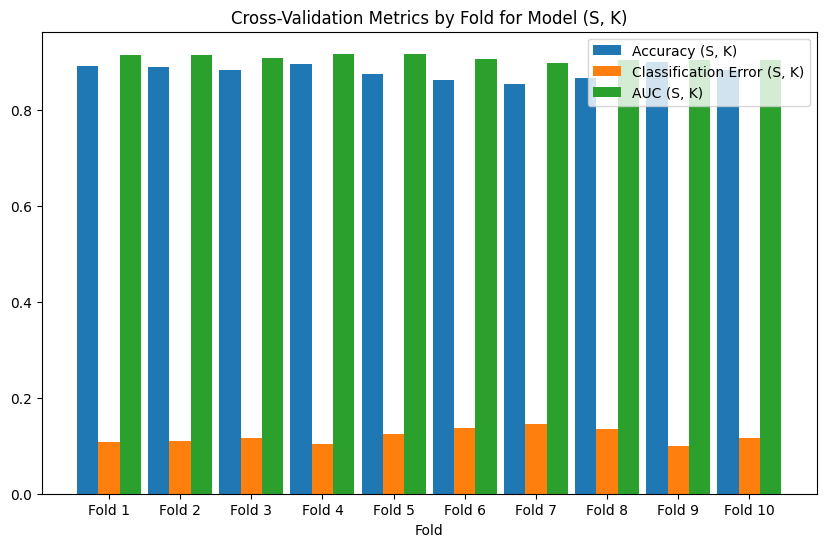

In [ ]:
import matplotlib.pyplot as plt

# Compute accuracy from classification errors
cv_accuracy_1 = [1 - x for x in cv_classification_errors_1]

# Setup the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Index for each label
indices = list(range(len(cv_classification_errors_1)))

# Bar width
bar_width = 0.3

# Accuracy bars
rects1 = ax.bar(indices, cv_accuracy_1, bar_width, label='Accuracy (S, K)')

# Error bars
rects2 = ax.bar([p + bar_width for p in indices], cv_classification_errors_1, bar_width, label='Classification Error (S, K)')

# AUC bars
rects3 = ax.bar([p + bar_width*2 for p in indices], cv_auc_1, bar_width, label='AUC (S, K)')

# Add some text for labels, title, and axes ticks
ax.set_xlabel('Fold')
ax.set_title('Cross-Validation Metrics by Fold for Model (S, K)')
ax.set_xticks([p + bar_width for p in indices])
ax.set_xticklabels([f"Fold {i+1}" for i in indices])
ax.legend()

# Show the plot
plt.show()


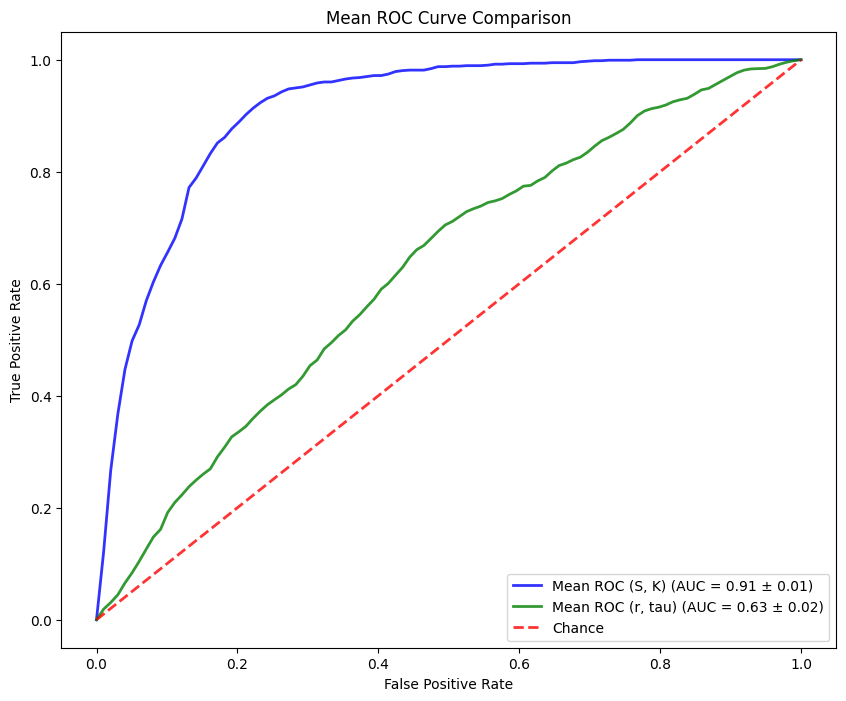

In [ ]:
# Plotting the mean ROC curve for the first model
mean_tpr_1 = np.mean(tprs_1, axis=0)
mean_tpr_1[-1] = 1.0
mean_auc_1 = np.mean(aucs_1)
std_auc_1 = np.std(aucs_1)

# Plotting the mean ROC curve for the second model
mean_tpr_2 = np.mean(tprs_2, axis=0)
mean_tpr_2[-1] = 1.0
mean_auc_2 = np.mean(aucs_2)
std_auc_2 = np.std(aucs_2)

# Create plot
plt.figure(figsize=(10, 8))
plt.plot(mean_fpr_1, mean_tpr_1, color='blue',
         label='Mean ROC (S, K) (AUC = %0.2f ± %0.2f)' % (mean_auc_1, std_auc_1),
         lw=2, alpha=.8)
plt.plot(mean_fpr_2, mean_tpr_2, color='green',
         label='Mean ROC (r, tau) (AUC = %0.2f ± %0.2f)' % (mean_auc_2, std_auc_2),
         lw=2, alpha=.8)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='red', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

> Add blockquote



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming 'train' DataFrame is predefined
train['Over'] = np.where(train['BS'] == 'Over', 1, 0)
X = train[['S', 'K', 'tau', 'r']]
y = train['Over']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

# Initialize the Logistic Regression model with no penalty
mlr = LogisticRegression(penalty=None, max_iter=300)
mlr.fit(X_train, y_train)

# Predict on the test set
y_pred = mlr.predict(X_test)

# Calculate accuracy
accuracy_lr = accuracy_score(y_test, y_pred)

# Calculate classification error
classification_error_lr = 1 - accuracy_lr

# Output both accuracy and classification error
print("Accuracy using Logistic Regression: {:.3f}".format(accuracy_lr))
print("Classification error using Logistic Regression: {:.3f}\n".format(classification_error_lr))


Accuracy using Logistic Regression: 0.865
Classification error using Logistic Regression: 0.135



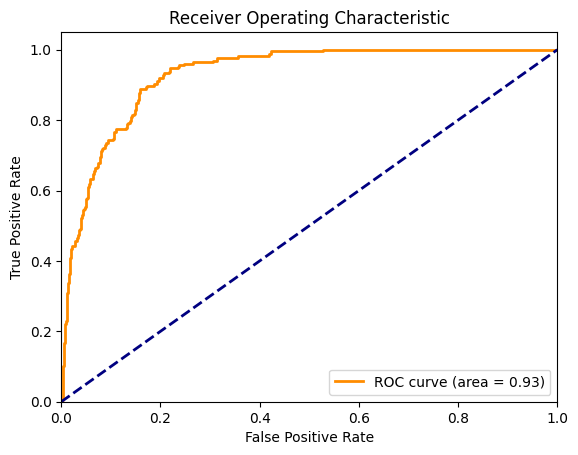

In [ ]:
from sklearn.metrics import roc_curve, auc

y_scores = mlr.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Random Forest


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming 'train' DataFrame is predefined and X, y are already defined
train['Over'] = np.where(train['BS'] == 'Over', 1, 0)
X = train[['S', 'K', 'tau', 'r']]
y = train['Over']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(random_state=1, n_estimators=200)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Calculate accuracy
score_test_rf = accuracy_score(y_test, y_pred_rf)

# Calculate classification error
classification_error_rf = 1 - score_test_rf

# Output both accuracy and classification error
print("Accuracy using Random Forest: {:.3f}".format(score_test_rf))
print("Classification error using Random Forest: {:.3f}\n".format(classification_error_rf))


Accuracy using Random Forest: 0.933
Classification error using Random Forest: 0.067



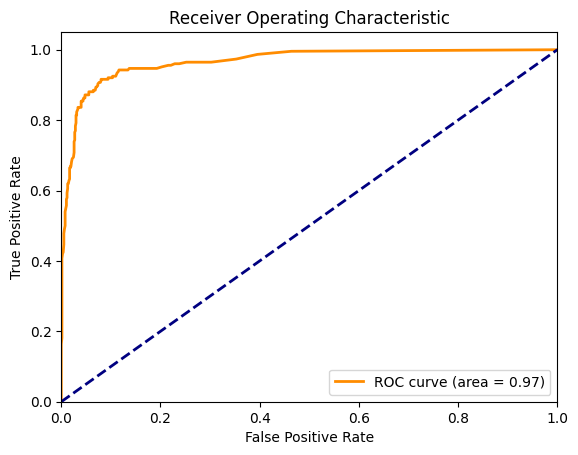

In [ ]:
from sklearn.metrics import roc_curve, auc

y_scores_rf = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# KNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming 'train' DataFrame is predefined
train['Over'] = np.where(train['BS'] == 'Over', 1, 0)
X = train[['S', 'K', 'tau', 'r']]
y = train['Over']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

# Define the number of neighbors
i = 5

# Instantiate the KNeighbors Classifier with i neighbors
knn = KNeighborsClassifier(n_neighbors=i)

# Fit the model using the training set
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Calculate the accuracy of the predictions
score_test_knn = accuracy_score(y_test, y_pred_knn)

# Calculate classification error
classification_error_knn = 1 - score_test_knn

# Output both accuracy and classification error
print(f"Accuracy of KNN with {i} neighbors: {score_test_knn:.3f}")
print(f"Classification error of KNN with {i} neighbors: {classification_error_knn:.3f}\n")


Accuracy of KNN with 5 neighbors: 0.860
Classification error of KNN with 5 neighbors: 0.140



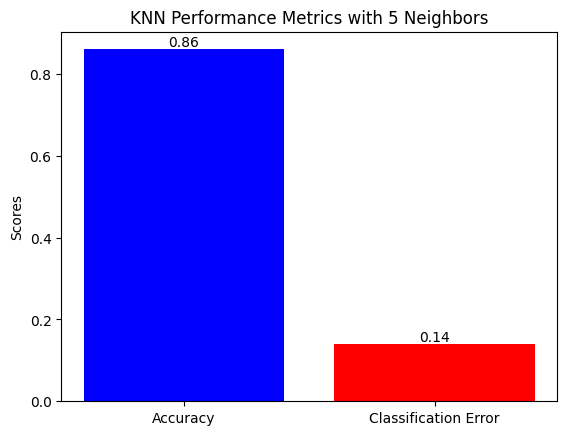

In [ ]:
import matplotlib.pyplot as plt

# Setup data for plotting
metrics = ['Accuracy', 'Classification Error']
values = [score_test_knn, classification_error_knn]

# Create the bar plot
fig, ax = plt.subplots()
bars = ax.bar(metrics, values, color=['blue', 'red'])

# Add some text for labels and title
ax.set_ylabel('Scores')
ax.set_title(f'KNN Performance Metrics with {i} Neighbors')

# Adding the actual value on top of each bar for clarity
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black')

# Show the plot
plt.show()


# DECISION TREES


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Assuming 'train' DataFrame is predefined
train['Over'] = np.where(train['BS'] == 'Over', 1, 0)
X = train[['S', 'K', 'tau', 'r']]
y = train['Over']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3, stratify=y)

# Instantiate the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=1)

# Fit the model using the training set
dtc.fit(X_train, y_train)

# Predict on the test set
y_pred_dtc = dtc.predict(X_test)

# Calculate the accuracy of the predictions
score_test_dtc = accuracy_score(y_test, y_pred_dtc)

# Calculate classification error
classification_error_dtc = 1 - score_test_dtc

# Output both accuracy and classification error
print(f"Accuracy of Decision Tree: {score_test_dtc:.3f}")
print(f"Classification error of Decision Tree: {classification_error_dtc:.3f}\n")


Accuracy of Decision Tree: 0.917
Classification error of Decision Tree: 0.083



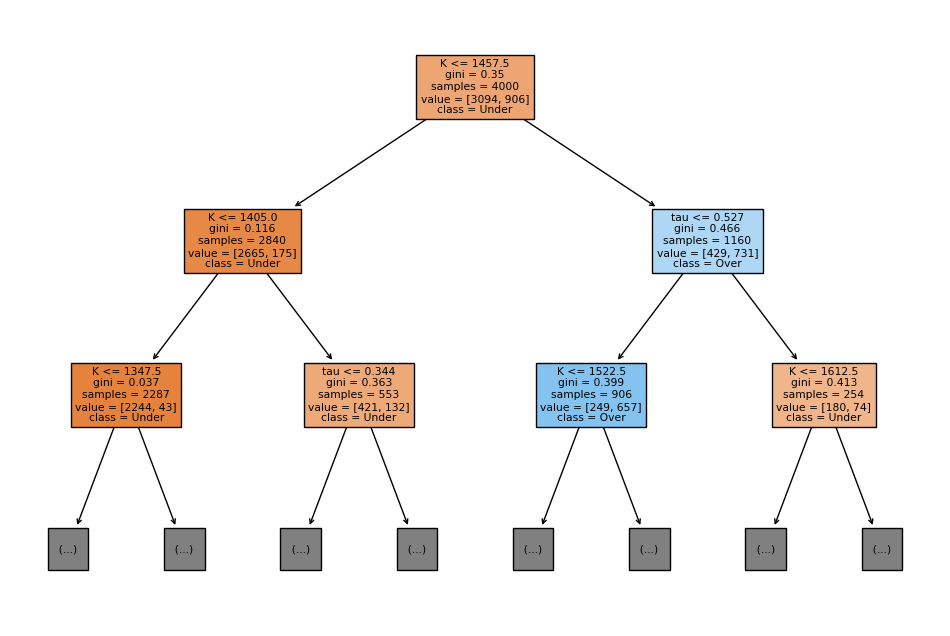

In [ ]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dtc, filled=True, feature_names=X.columns, class_names=['Under', 'Over'], max_depth=2)
plt.show()



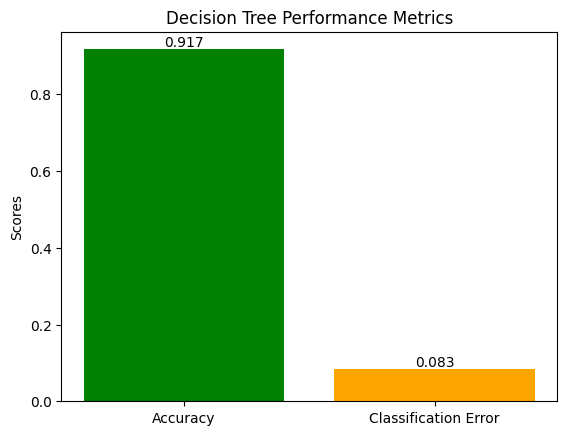

In [ ]:
# Define the metrics for plotting
metrics = ['Accuracy', 'Classification Error']
values = [score_test_dtc, classification_error_dtc]  # Use the correct variable names

# Create the bar plot
fig, ax = plt.subplots()
bars = ax.bar(metrics, values, color=['green', 'orange'])

# Add some text for labels and title
ax.set_ylabel('Scores')
ax.set_title('Decision Tree Performance Metrics')

# Adding the actual value on top of each bar for clarity
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom', color='black')

# Show the plot
plt.show()


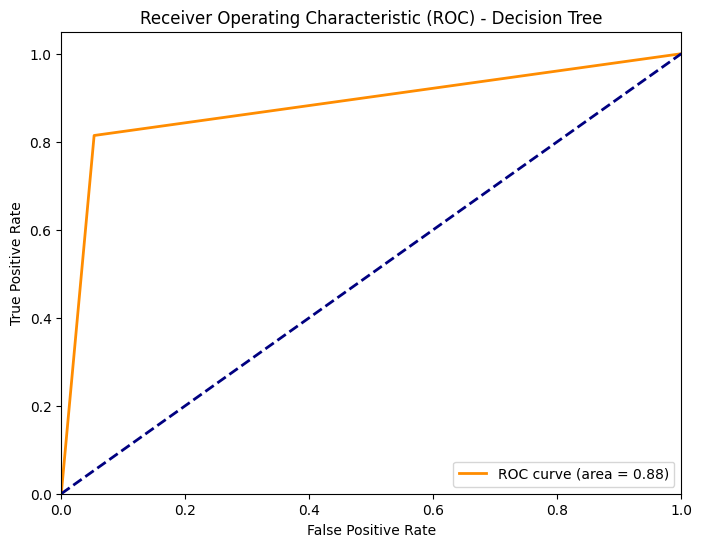

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict class probabilities for the test data
y_probs_dtc = dtc.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Generate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_probs_dtc)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Decision Tree')
plt.legend(loc="lower right")
plt.show()
